# Modelo de Clustering

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import random
from sklearn.svm import SVC
import seaborn as sns
import os
from sklearn.feature_extraction import FeatureHasher

In [3]:
path = os.getcwd()
path = path.replace("\\", "\\\\")
path = path.replace("\\\\", "/")
path_data = "/".join(path.split("/")[:-1]) + "/Data/"
path_est = path_data + "Estandarizada/"

In [4]:
df = pd.read_csv(path_est + "data_refined.csv", keep_default_na=False, na_values="", sep=',')
df['FECHA'] = pd.to_datetime(df.FECHA).dt.to_period('m')

df['FECHA'] = df['FECHA'].astype(str)
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y/%m/%d')
df = df.set_index('FECHA')

In [5]:
df.drop("FECHA", axis = 1, inplace = True)
df = df.set_index('PROVINCIA')

In [6]:
df

,ALTITUD,TEMP_MED,PREC,DIR,VEL_MEDIA,RACHA,PRES_MIN,SOL,TASA_INCIDENCIA
PROVINCIA,,,,,,,,,
A CORUÑA,58.0,11.519355,3.848387,23.580645,3.706452,12.183871,1013.903226,3.838710,0.09
ALBACETE,674.0,6.996774,1.354839,32.483871,0.916129,6.451613,945.961290,5.474194,0.00
ALICANTE,81.0,11.664516,1.193548,22.000000,1.767742,7.741935,1013.180645,6.896774,0.00
ALMERIA,21.0,12.487097,0.690323,53.967742,3.425806,9.629032,1020.690323,6.409677,0.00
ARABA/ALAVA,513.0,5.445161,0.948387,54.516129,3.229032,10.045161,963.483871,3.254839,0.00
...,...,...,...,...,...,...,...,...,...
TOLEDO,690.0,5.757143,0.028571,19.892857,3.935714,11.978571,940.478571,7.700000,40.03
VALENCIA,56.0,9.582143,1.014286,59.678571,2.817857,8.164286,1015.625000,6.250000,24.16
VALLADOLID,846.0,4.242857,0.267857,13.107143,3.760714,9.750000,924.460714,7.260714,78.59


In [7]:
selected_features = ['ALTITUD', 'TEMP_MED', 'PREC', 'DIR', 'VEL_MEDIA', 'RACHA', 'PRES_MIN', 'SOL', 'TASA_INCIDENCIA']

In [8]:
X_train = df[selected_features]

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics

ks = []
k_inertias = []
silhouettes = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state= 42).fit(X_train)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

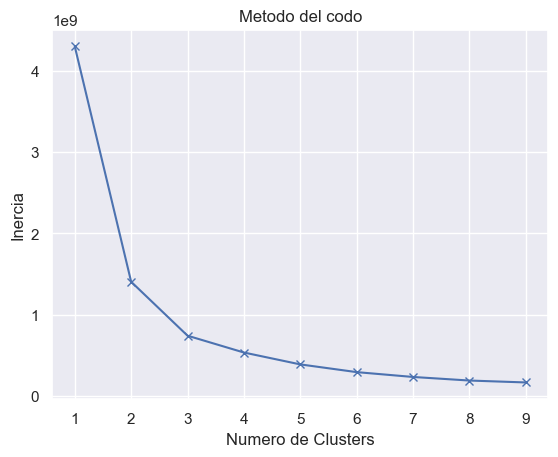

In [10]:
plt.xlabel("Numero de Clusters")
plt.ylabel("Inercia")
plt.title("Metodo del codo")
plt.plot(ks, k_inertias, 'bx-')
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

In [12]:
df

,ALTITUD,TEMP_MED,PREC,DIR,VEL_MEDIA,RACHA,PRES_MIN,SOL,TASA_INCIDENCIA,cluster
PROVINCIA,,,,,,,,,,
A CORUÑA,58.0,11.519355,3.848387,23.580645,3.706452,12.183871,1013.903226,3.838710,0.09,0
ALBACETE,674.0,6.996774,1.354839,32.483871,0.916129,6.451613,945.961290,5.474194,0.00,0
ALICANTE,81.0,11.664516,1.193548,22.000000,1.767742,7.741935,1013.180645,6.896774,0.00,0
ALMERIA,21.0,12.487097,0.690323,53.967742,3.425806,9.629032,1020.690323,6.409677,0.00,0
ARABA/ALAVA,513.0,5.445161,0.948387,54.516129,3.229032,10.045161,963.483871,3.254839,0.00,0
...,...,...,...,...,...,...,...,...,...,...
TOLEDO,690.0,5.757143,0.028571,19.892857,3.935714,11.978571,940.478571,7.700000,40.03,0
VALENCIA,56.0,9.582143,1.014286,59.678571,2.817857,8.164286,1015.625000,6.250000,24.16,0
VALLADOLID,846.0,4.242857,0.267857,13.107143,3.760714,9.750000,924.460714,7.260714,78.59,0


In [13]:
df.groupby(['cluster']).agg(
                                   ALTITUD_MED=('ALTITUD', 'mean'), 
                                   TEMP_MED_TO=('TEMP_MED', 'mean'),
                                   PREC_MED=('PREC', 'mean'),
                                   DIR_MED=('DIR', 'mean'),
                                   VEL_MEDIA=('VEL_MEDIA','mean'),
                                   RACHA_MED=('RACHA','mean'),
                                   PRES_MIN_MED=('PRES_MIN','mean'),
                                   SOL_MED=('SOL','mean'),
                                   TASA_INCIDENCIA_MED=('TASA_INCIDENCIA','mean'),
                                   )

,ALTITUD_MED,TEMP_MED_TO,PREC_MED,DIR_MED,VEL_MEDIA,RACHA_MED,PRES_MIN_MED,SOL_MED,TASA_INCIDENCIA_MED
cluster,,,,,,,,,
0,391.701261,16.432753,1.555208,32.199383,3.105878,9.874806,970.835240,7.427960,348.876726
1,446.272727,7.266569,1.227126,31.866569,2.430792,8.177273,972.132185,6.170455,8685.637500
2,439.271277,11.360588,1.381100,33.481717,3.028772,9.668964,967.373605,6.083078,2391.619149


In [16]:
df2 = df.groupby(['cluster', 'PROVINCIA']).agg(
                                   ALTITUD_MED=('ALTITUD', 'mean'), 
                                   TEMP_MED_TO=('TEMP_MED', 'mean'),
                                   PREC_MED=('PREC', 'mean'),
                                   DIR_MED=('DIR', 'mean'),
                                   VEL_MEDIA=('VEL_MEDIA','mean'),
                                   RACHA_MED=('RACHA','mean'),
                                   PRES_MIN_MED=('PRES_MIN','mean'),
                                   SOL_MED=('SOL','mean'),
                                   TASA_INCIDENCIA_MED=('TASA_INCIDENCIA','mean'),
                                   )


In [18]:
df2.reset_index()

,cluster,PROVINCIA,ALTITUD_MED,TEMP_MED_TO,PREC_MED,DIR_MED,VEL_MEDIA,RACHA_MED,PRES_MIN_MED,SOL_MED,TASA_INCIDENCIA_MED
0,0,A CORUÑA,58.0,15.880115,2.636565,26.632044,3.614550,11.094517,1008.472046,6.551150,286.542727
1,0,ALBACETE,674.0,16.677112,1.150050,25.726807,1.138133,8.240066,939.690029,8.058082,339.534118
2,0,ALICANTE,81.0,19.584696,0.805511,19.436346,2.236883,8.155260,1005.786934,8.945916,262.237941
3,0,ALMERIA,21.0,20.051710,0.521411,47.671208,4.573491,11.542843,1012.709150,8.628382,316.532857
4,0,ARABA/ALAVA,513.0,12.904151,1.746834,44.608870,3.426385,10.811970,957.374322,5.595001,461.332000
...,...,...,...,...,...,...,...,...,...,...,...
139,2,TOLEDO,690.0,7.310192,0.462389,22.528879,3.139113,10.790384,938.138376,6.876640,2766.260000
140,2,VALENCIA,56.0,15.425144,0.381538,49.112615,3.926469,10.400547,1009.067771,7.887874,2661.512500
141,2,VALLADOLID,846.0,9.777439,0.856438,18.120645,4.134725,10.744141,920.481836,6.826382,1871.952000
142,2,ZAMORA,715.0,10.211717,0.932332,21.845622,2.193577,9.194181,934.846772,5.715997,1900.500000


In [19]:
df2 = df2.reset_index()
df2.to_csv("data_cluster.csv", index=False)

In [161]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

pca = PCA(n_components=2)

estimator = pca.fit_transform(X_train)
result = pd.DataFrame(estimator)
result.columns = ['X', 'Y']
result['cluster'] = kmeans.labels_
result['TEMP'] = round(df['TEMP_MED'], 2)
result["TASA_INCIDENCIA_MED"] = round(df["TASA_INCIDENCIA"],2)
result["texto"] = "TEMP_MED= "+result['TEMP'].astype(str) + " TASA_INCIDENCIA_MED=" + result["TASA_INCIDENCIA_MED"].astype(str)


colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green'
             #3: 'red'
            }

print("Componentes lineales:\n", pca.components_)
print("\nRatio de variabilidad: ", pca.explained_variance_ratio_, "\n") 
result['colores'] = result['cluster'].map(colorsIdx)


result

Componentes lineales:
 [[ 1.22892818e-02 -1.25208692e-03 -4.02098249e-05  7.51778780e-05
  -6.24096774e-05 -1.44994905e-04 -6.36111227e-04 -2.33128881e-04
   9.99923454e-01]
 [ 9.93493673e-01 -5.62687957e-03 -3.35537557e-04 -1.23090989e-02
  -9.18503659e-04 -1.90131737e-04 -1.12406003e-01 -2.20143343e-04
  -1.22880367e-02]]

Ratio de variabilidad:  [0.93552933 0.0643766 ] 



,X,Y,cluster,TEMP,TASA_INCIDENCIA_MED,texto,colores
0,-732.911431,-333.023230,0,11.52,0.09,TEMP_MED= 11.52 TASA_INCIDENCIA_MED=0.09,blue
1,-725.380952,286.527047,0,7.00,0.00,TEMP_MED= 7.0 TASA_INCIDENCIA_MED=0.0,blue
2,-732.718453,-310.069065,0,11.66,0.00,TEMP_MED= 11.66 TASA_INCIDENCIA_MED=0.0,blue
3,-733.459457,-370.922546,0,12.49,0.00,TEMP_MED= 12.49 TASA_INCIDENCIA_MED=0.0,blue
4,-727.367205,124.340273,0,5.45,0.00,TEMP_MED= 5.45 TASA_INCIDENCIA_MED=0.0,blue
...,...,...,...,...,...,...,...
1971,-685.154750,302.705436,0,5.76,40.03,TEMP_MED= 5.76 TASA_INCIDENCIA_MED=40.03,blue
1972,-708.863618,-335.930960,0,9.58,24.16,TEMP_MED= 9.58 TASA_INCIDENCIA_MED=24.16,blue
1973,-644.668571,459.109773,0,4.24,78.59,TEMP_MED= 4.24 TASA_INCIDENCIA_MED=78.59,blue
1974,-540.966273,325.899103,0,5.13,183.92,TEMP_MED= 5.13 TASA_INCIDENCIA_MED=183.92,blue


In [162]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

(1976, 3)
[0.93552933 0.99990593 0.99997252]


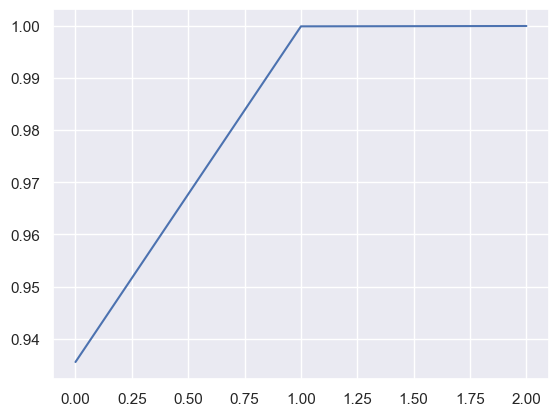

In [170]:
pca_var = PCA(3)
X_proj = pca_var.fit_transform(X_train)
print(X_proj.shape)
cumvar = np.cumsum(pca_var.explained_variance_ratio_)
print(cumvar)
plt.plot(cumvar)